In [77]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load the dataset

In [3]:
bankloan= pd.read_csv(r"C:\Users\Shreyas\Downloads\bankloan.csv")

In [4]:
bankloan

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [5]:
bankloan.shape

(5000, 14)

In [6]:
bankloan.describe()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
bankloan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal.Loan', 'Securities.Account',
       'CD.Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
bankloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
bankloan.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP.Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal.Loan           int64
Securities.Account      int64
CD.Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [10]:
bankloan.duplicated().sum()

0

In [11]:
bankloan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

# EDA

In [73]:
Personal_Loan_count = bankloan['Personal.Loan'].value_counts().reset_index()
Personal_Loan_count.columns = ['Personal.Loan', 'count']  
Personal_Loan_count

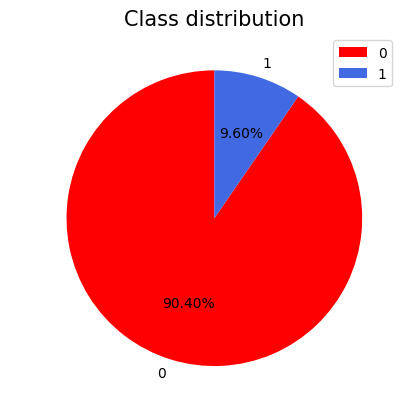

In [74]:
#plt.figure(figsize = (20, 10))
bankloan['Personal.Loan'].value_counts().plot.pie(startangle=90,autopct="%.2f%%",colors=["red","royalblue"])
plt.title("Class distribution", fontsize=15);
plt.ylabel(" ")
plt.legend(loc="upper right");

# Family count

In [71]:
family_count = bankloan['Family'].value_counts().reset_index()
family_count

,Family,count
0,1,1472
1,2,1296
2,4,1222
3,3,1010


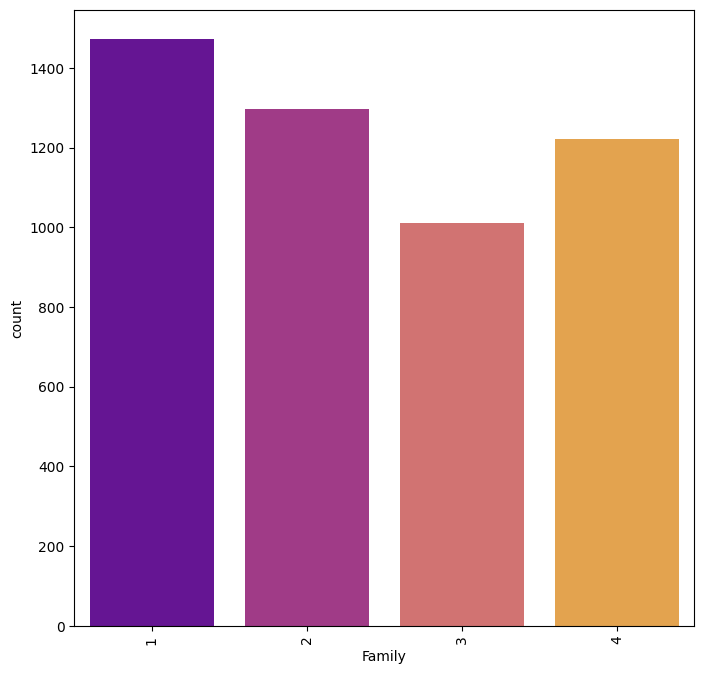

In [93]:
plt.figure(figsize=(8, 8))
sns.barplot(x="Family",y="count",data=family_count,ci=0,estimator=np.median,palette='plasma')
plt.xticks(rotation=90);

In [80]:
bankloan.head(2)

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


# CreditCard

In [87]:
Credit_card_count = bankloan['CreditCard'].value_counts().reset_index()
Credit_card_count.columns = ['CreditCard', 'count']  
Credit_card_count

,CreditCard,count
0,0,3530
1,1,1470


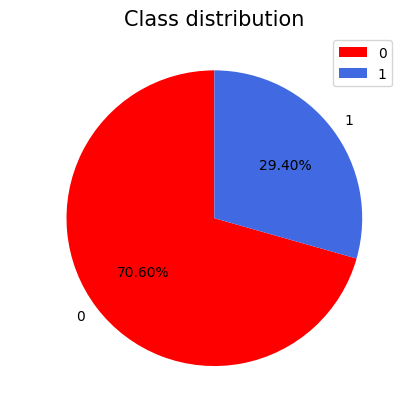

In [86]:
#plt.figure(figsize = (20, 10))
bankloan['CreditCard'].value_counts().plot.pie(startangle=90,autopct="%.2f%%",colors=["red","royalblue"])
plt.title("Class distribution", fontsize=15);
plt.ylabel(" ")
plt.legend(loc="upper right");

# Education Count

In [ ]:
bankloan.Education.value_counts()

In [91]:
Education_count = bankloan['Education'].value_counts().reset_index()
Education_count.columns = ['Education', 'count'] 
Education_count

,Education,count
0,1,2096
1,3,1501
2,2,1403


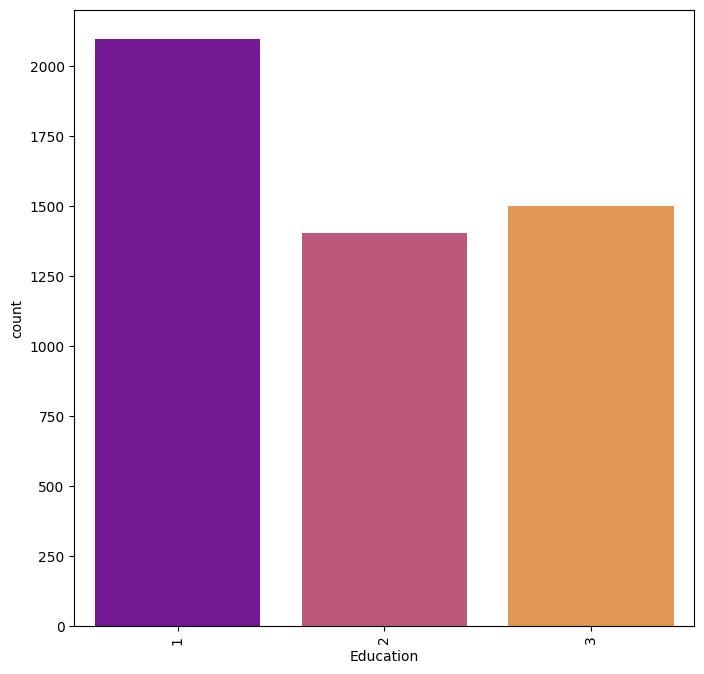

In [94]:
plt.figure(figsize=(8, 8))
sns.barplot(x="Education",y="count",data=Education_count,ci=0,estimator=np.median,palette='plasma')
plt.xticks(rotation=90);

In [101]:
bankloan['Securities.Account'].value_counts()

Securities.Account
0    4478
1     522
Name: count, dtype: int64

In [ ]:
# 

In [103]:
Securities_Account_count = bankloan['Securities.Account'].value_counts().reset_index()
Securities_Account_count.columns = ['Securities.Account', 'count']  
Securities_Account_count

,Securities.Account,count
0,0,4478
1,1,522


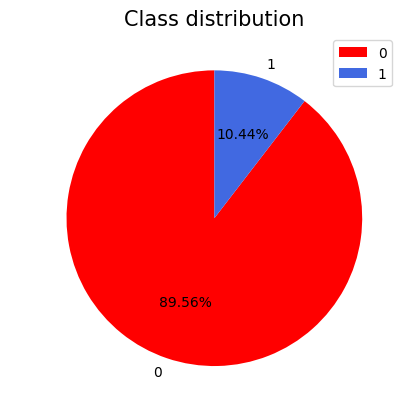

In [104]:
#plt.figure(figsize = (20, 10))
bankloan['Securities.Account'].value_counts().plot.pie(startangle=90,autopct="%.2f%%",colors=["red","royalblue"])
plt.title("Class distribution", fontsize=15);
plt.ylabel(" ")
plt.legend(loc="upper right");

# Correlation heatmap

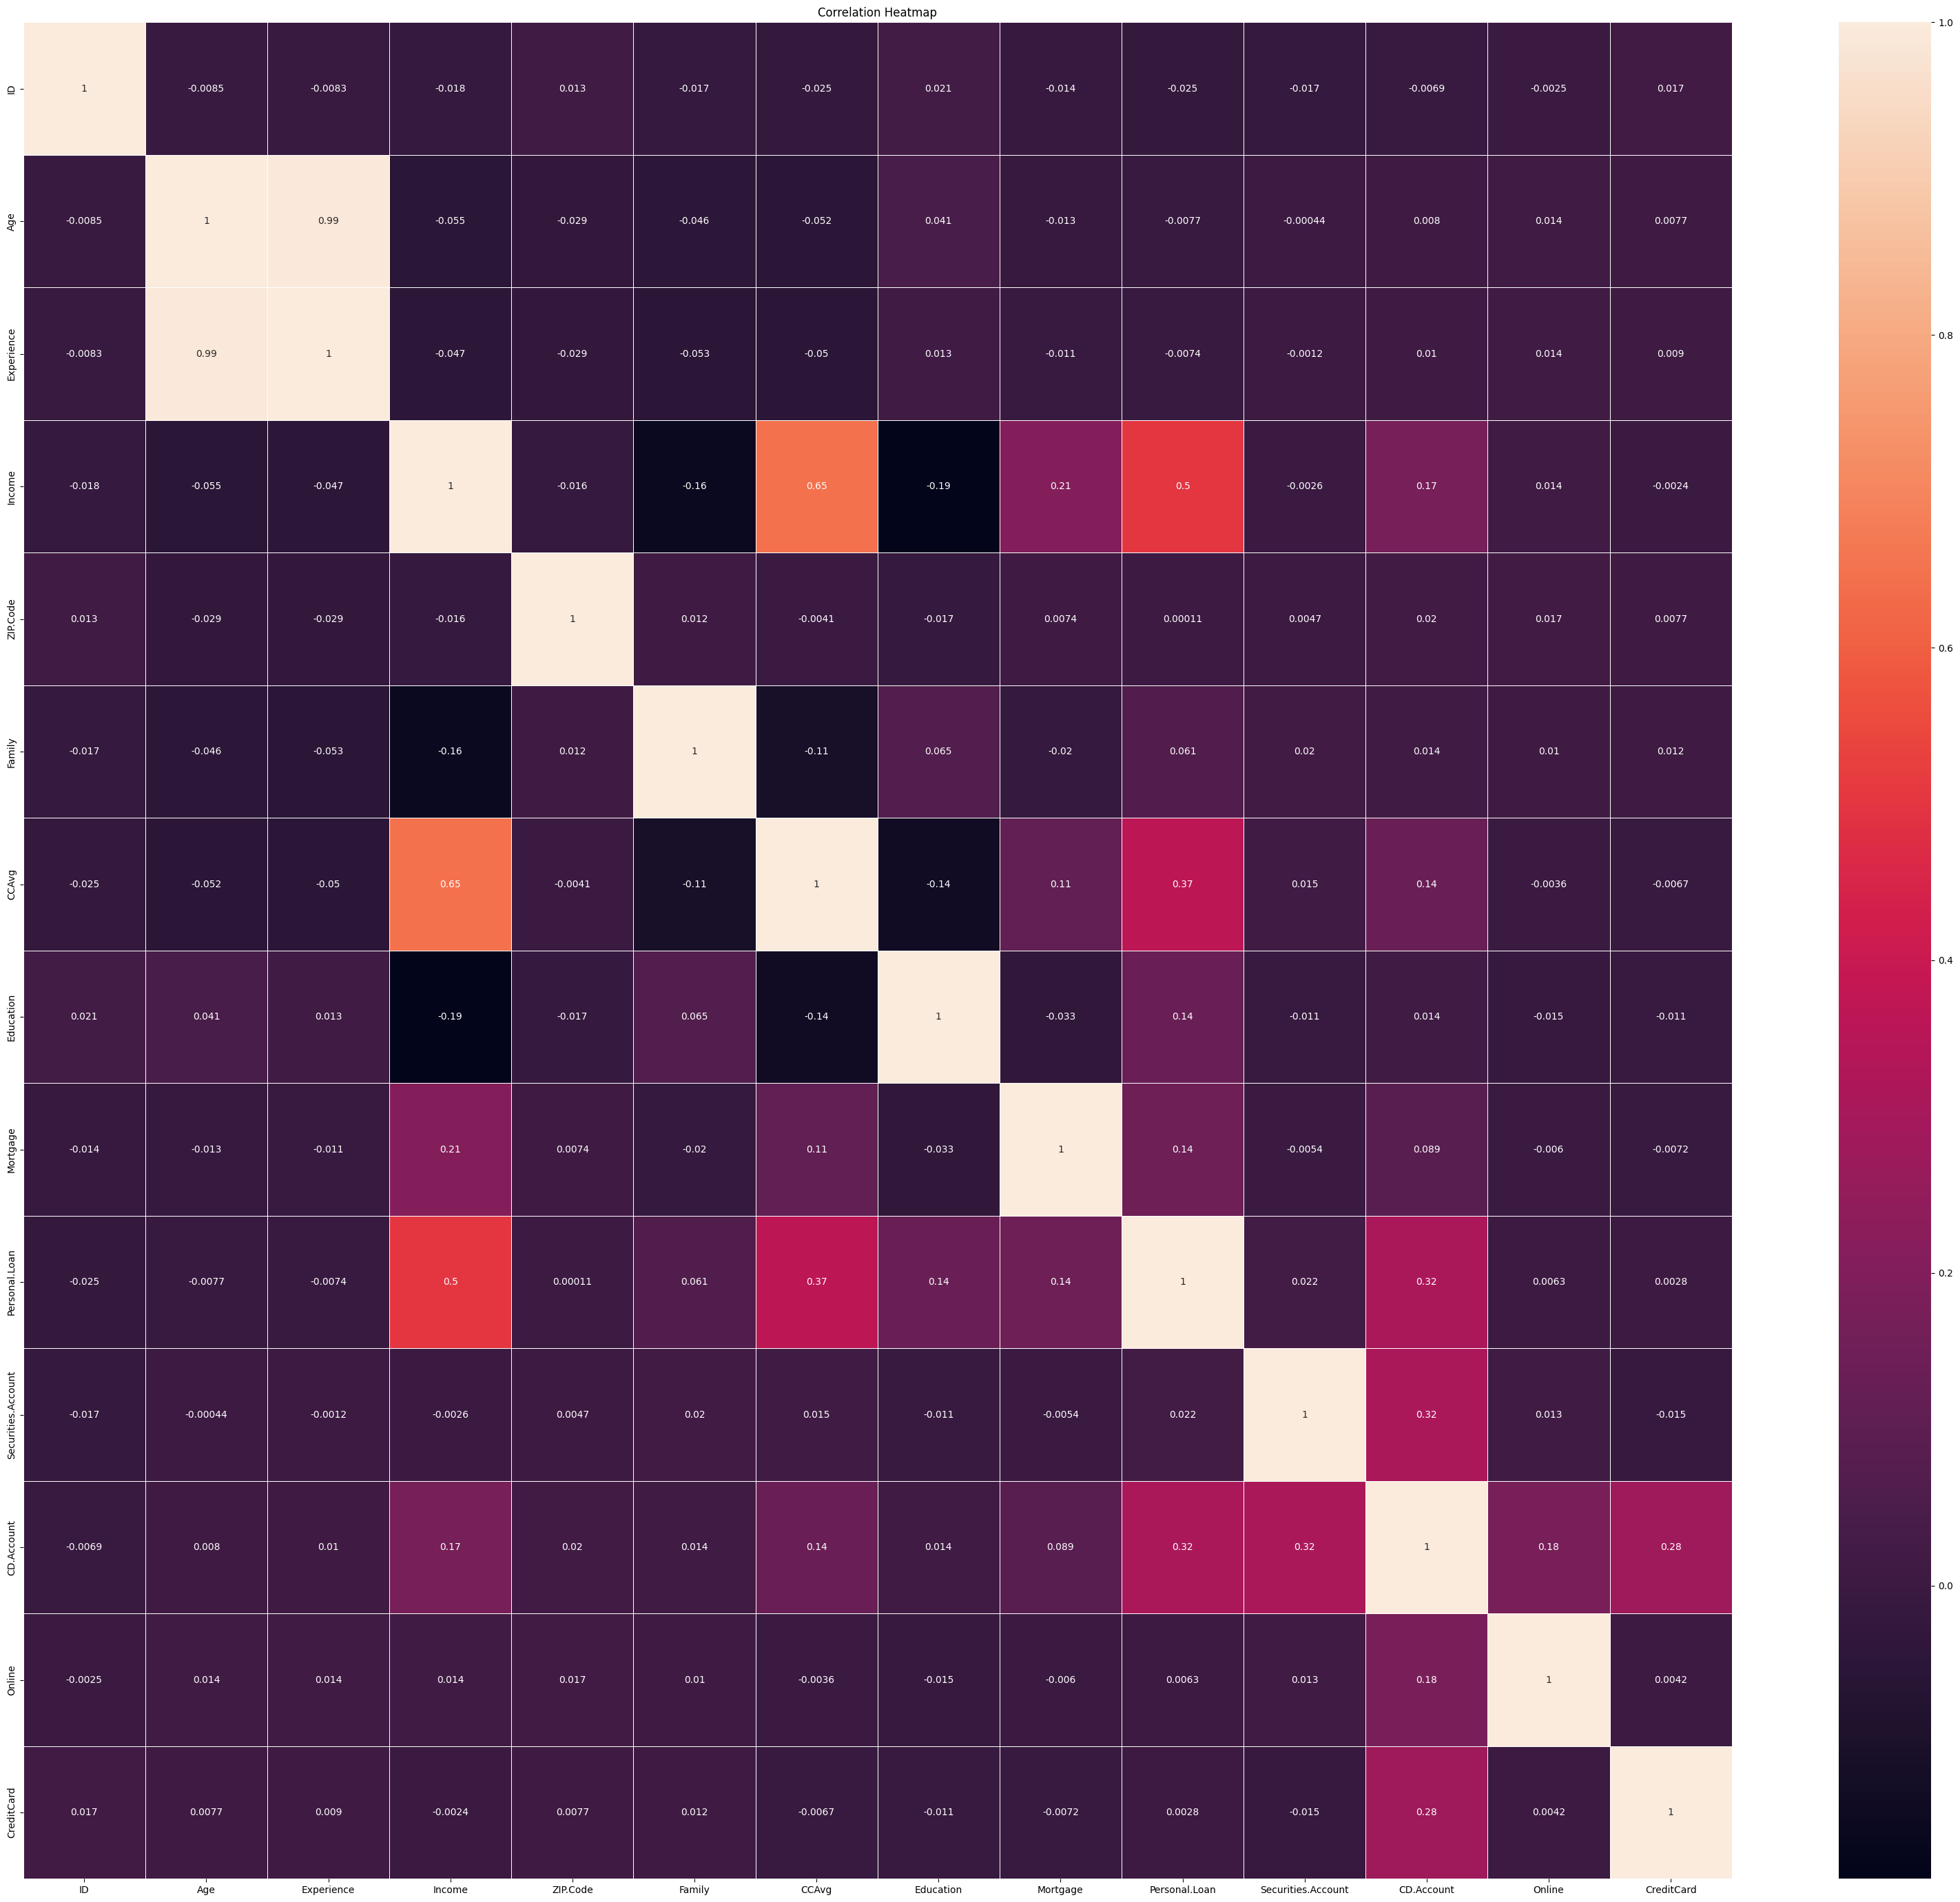

In [130]:
plt.figure(figsize=(40,35))
correlation = bankloan.corr()
sns.heatmap(correlation, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Dropping 

In [12]:

bankloan_df_cleaned = bankloan.drop(columns=['ID', 'ZIP.Code'])


# Step 3: Define X and y

In [13]:

X_bankloan = bankloan_df_cleaned.drop(columns=['Personal.Loan'])
Y_bankloan = bankloan_df_cleaned['Personal.Loan']



# Step 4: Split the data into training and testing sets

In [14]:

X_train_bankloan, X_test_bankloan, Y_train_bankloan, Y_test_bankloan = train_test_split(X_bankloan, Y_bankloan, test_size=0.3, random_state=42)


# Step 5: Scale the data using StandardScaler

In [15]:

scaler = StandardScaler()
X_train_bankloan_scaled = scaler.fit_transform(X_train_bankloan)
X_test_bankloan_scaled = scaler.transform(X_test_bankloan)


In [16]:
print(X_train_bankloan_scaled.shape)
print(Y_train_bankloan.shape)
print(X_test_bankloan_scaled.shape)
print(Y_test_bankloan.shape)

(3500, 11)
(3500,)
(1500, 11)
(1500,)


# Step 6: Model 1 - Logistic Regression


In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
log_reg = LogisticRegression()
log_reg.fit(X_train_bankloan_scaled, Y_train_bankloan)
print(log_reg.intercept_)
print(log_reg.coef_)


[-4.54482569]
[[-0.17163992  0.3203105   2.3461909   0.77969943  0.21108727  1.33141624
   0.06705492 -0.29116288  0.85470111 -0.26789411 -0.51939108]]


In [19]:
print(list(zip(bankloan.columns[0:-1], log_reg.coef_.ravel())))

[('ID', -0.17163992301611067), ('Age', 0.32031050032503955), ('Experience', 2.3461909022417187), ('Income', 0.7796994294590873), ('ZIP.Code', 0.21108726966157904), ('Family', 1.3314162423528455), ('CCAvg', 0.06705491710245168), ('Education', -0.29116288178120436), ('Mortgage', 0.854701106935195), ('Personal.Loan', -0.26789411407291147), ('Securities.Account', -0.519391075245737)]


In [20]:
y_pred_log_reg = log_reg.predict(X_test_bankloan_scaled)
log_reg_acc = accuracy_score(Y_test_bankloan, y_pred_log_reg)
log_reg_report = classification_report(Y_test_bankloan, y_pred_log_reg)
print(y_pred_log_reg)


[0 0 0 ... 0 0 1]


In [21]:
Y_pred_prob=log_reg.predict_proba(X_test_bankloan_scaled)
Y_pred_prob

array([[9.99815394e-01, 1.84606385e-04],
       [7.39604863e-01, 2.60395137e-01],
       [9.73293037e-01, 2.67069632e-02],
       ...,
       [9.94563907e-01, 5.43609254e-03],
       [9.80629914e-01, 1.93700857e-02],
       [6.90057937e-03, 9.93099421e-01]])

In [22]:
cfm=confusion_matrix(Y_test_bankloan,y_pred_log_reg)
print(cfm)
print(f"Logistic Regression Accuracy: {log_reg_acc}")
print(log_reg_report)
print(f"Logistic Regression Accuracy: {log_reg_acc}")


[[1324   19]
 [  53  104]]
Logistic Regression Accuracy: 0.952
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.85      0.66      0.74       157

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.86      1500
weighted avg       0.95      0.95      0.95      1500

Logistic Regression Accuracy: 0.952


In [23]:
Y_pred_log_reg=[]
for value in Y_pred_prob[:,1]:
    if value > 0.46:
        Y_pred_log_reg.append(1)
    else:
        Y_pred_log_reg.append(0)
#print(y_pred_class)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test_bankloan,Y_pred_log_reg)
print(cfm)
acc=accuracy_score(Y_test_bankloan, Y_pred_log_reg)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test_bankloan, Y_pred_log_reg))

[[1322   21]
 [  51  106]]
Accuracy of the model:  0.952
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1343
           1       0.83      0.68      0.75       157

    accuracy                           0.95      1500
   macro avg       0.90      0.83      0.86      1500
weighted avg       0.95      0.95      0.95      1500



In [25]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(Y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test_bankloan, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 72  , type 2 error : 45  , type 1 error: 27
Errors at threshold  0.41000000000000003 : 73  , type 2 error : 46  , type 1 error: 27
Errors at threshold  0.42000000000000004 : 72  , type 2 error : 47  , type 1 error: 25
Errors at threshold  0.43000000000000005 : 72  , type 2 error : 47  , type 1 error: 25
Errors at threshold  0.44000000000000006 : 73  , type 2 error : 48  , type 1 error: 25
Errors at threshold  0.45000000000000007 : 73  , type 2 error : 50  , type 1 error: 23
Errors at threshold  0.4600000000000001 : 72  , type 2 error : 51  , type 1 error: 21
Errors at threshold  0.4700000000000001 : 73  , type 2 error : 52  , type 1 error: 21
Errors at threshold  0.4800000000000001 : 72  , type 2 error : 52  , type 1 error: 20
Errors at threshold  0.4900000000000001 : 73  , type 2 error : 53  , type 1 error: 20
Errors at threshold  0.5000000000000001 : 72  , type 2 error : 53  , type 1 error: 19
Errors at threshold  0.5100000000000001 : 71  , type 2 error : 5

# Step 7: Model 2 - Decision Tree

In [26]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_bankloan_scaled, Y_train_bankloan)

DecisionTreeClassifier(random_state=42)

In [31]:
y_pred_dt = dt_clf.predict(X_test_bankloan_scaled)
dt_acc = accuracy_score(Y_test_bankloan, y_pred_dt)

In [30]:
cfm=confusion_matrix(Y_test_bankloan,y_pred_log_reg)
print(cfm)
dt_report = classification_report(Y_test_bankloan, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_acc}")
print(dt_report)
print(f"Decision Tree Accuracy: {dt_acc}")

[[1324   19]
 [  53  104]]
Decision Tree Accuracy: 0.9793333333333333
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.91      0.89      0.90       157

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500

Decision Tree Accuracy: 0.9793333333333333


In [32]:
dt_clf.score(X_train_bankloan,Y_train_bankloan) #checking the accuracy on training data

C:\Users\Shreyas\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.09228571428571429

In [36]:
dt_clf.feature_importances_

array([0.01273931, 0.01976226, 0.30532653, 0.16286354, 0.07819102,
       0.37500479, 0.01489169, 0.        , 0.01420703, 0.01445577,
       0.00255805])

# Print the length of columns and feature importances

In [38]:
print(f"Number of columns: {len(bankloan.columns[0:-1])}")
print(f"Number of feature importances: {len(dt_clf.feature_importances_)}")

# Align the columns with the feature importances
# Ensure that the same columns were used for training
sample = pd.DataFrame({
    "Column": bankloan.columns[0:len(dt_clf.feature_importances_)],
    "Imp value": dt_clf.feature_importances_
})
sample.sort_values("Imp value", ascending=False)


Number of columns: 13
Number of feature importances: 11


,Column,Imp value
5,Family,0.375005
2,Experience,0.305327
3,Income,0.162864
4,ZIP.Code,0.078191
1,Age,0.019762
6,CCAvg,0.014892
9,Personal.Loan,0.014456
8,Mortgage,0.014207
0,ID,0.012739
10,Securities.Account,0.002558


# Model : DecisionTree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='gini',
                               splitter='best',
                               min_samples_leaf=3,
                                min_samples_split=5,
                                max_depth=10,
                                max_leaf_nodes=100,#max_features=0.6,
                               )
dt_clf.fit(X_train_bankloan,Y_train_bankloan)
Y_pred=dt_clf.predict(X_test_bankloan)
#print(list(zip(Y_test_bankloan,Y_pred)))

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(Y_test_bankloan,Y_pred)) 
print(accuracy_score(Y_test_bankloan, Y_pred))
print(classification_report(Y_test_bankloan,Y_pred))

[[1334    9]
 [  20  137]]
0.9806666666666667
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.94      0.87      0.90       157

    accuracy                           0.98      1500
   macro avg       0.96      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



# KNeighborsClassifier
# SVC

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

 
# first, initialize the classificators
tree= DecisionTreeClassifier(random_state=10) # using the random state for reproducibility
knn= KNeighborsClassifier(n_neighbors=5,metric='euclidean')
svm= SVC(kernel="rbf", gamma=0.1, C=90,random_state=10)


In [43]:
# now, create a list with the objects 
models= [tree, knn, svm]

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
 
for model in models:
    model.fit(X_train_bankloan, Y_train_bankloan) # fit the model
    Y_pred= model.predict(X_test_bankloan) # then predict on the test set
    accuracy= accuracy_score(Y_test_bankloan, Y_pred) 
    clf_report= classification_report(Y_test_bankloan, Y_pred) 
    print(confusion_matrix(Y_test_bankloan,Y_pred))
    print("The accuracy of the ",type(model).__name__, " model is ", accuracy*100 )
    print("Classification report:\n", clf_report)
    print("\n")

[[1332   11]
 [  17  140]]
The accuracy of the  DecisionTreeClassifier  model is  98.13333333333333
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.93      0.89      0.91       157

    accuracy                           0.98      1500
   macro avg       0.96      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



[[1304   39]
 [ 105   52]]
The accuracy of the  KNeighborsClassifier  model is  90.4
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1343
           1       0.57      0.33      0.42       157

    accuracy                           0.90      1500
   macro avg       0.75      0.65      0.68      1500
weighted avg       0.89      0.90      0.89      1500



[[1332   11]
 [ 135   22]]
The accuracy of the  SVC  model is  90.26666666666667
Classification report:
     

# Step 8: Model 3 - Random Forest

In [45]:

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_bankloan_scaled, Y_train_bankloan)

RandomForestClassifier(random_state=42)

In [46]:
y_pred_rf = rf_clf.predict(X_test_bankloan_scaled)
rf_acc = accuracy_score(Y_test_bankloan, y_pred_rf)

In [47]:
print(confusion_matrix(Y_test_bankloan,Y_pred))
rf_report = classification_report(Y_test_bankloan, y_pred_rf)
print(f"Random Forest Accuracy: {rf_acc}")
print(rf_report)
print(f"Random Forest Accuracy: {rf_acc}")

[[1332   11]
 [ 135   22]]
Random Forest Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1343
           1       0.99      0.91      0.95       157

    accuracy                           0.99      1500
   macro avg       0.99      0.96      0.97      1500
weighted avg       0.99      0.99      0.99      1500

Random Forest Accuracy: 0.99


In [50]:
# If the lengths don't match, select only the first N columns matching the number of feature importances
if len(bankloan.columns[0:-1]) != len(rf_clf.feature_importances_):
    # Adjust columns to match feature importances
    sample = pd.DataFrame({
        "Column": bankloan.columns[0:len(rf_clf.feature_importances_)],
        "Imp value": rf_clf.feature_importances_
    })
else:
    # Directly assign if lengths match
    sample = pd.DataFrame({
        "Column": bankloan.columns[0:-1],
        "Imp value": rf_clf.feature_importances_
    })

# Sort the DataFrame based on importance values
sample.sort_values("Imp value", ascending=False)


,Column,Imp value
2,Experience,0.342828
5,Family,0.187240
4,ZIP.Code,0.165200
3,Income,0.111932
8,Mortgage,0.050375
1,Age,0.043692
0,ID,0.039189
6,CCAvg,0.038843
10,Securities.Account,0.008283
9,Personal.Loan,0.008099


# ExtraTrees

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
 
model_EXT=ExtraTreesClassifier(n_estimators=100,  #no. of bags (100 by default)
                                          random_state=10, bootstrap=False) #with replacement nhi hoga bcoz bootstrap=False
 
#fit the model on the data and predict the values
model_EXT.fit(X_train_bankloan,Y_train_bankloan)
 
Y_pred=model_EXT.predict(X_test_bankloan)

In [52]:
print(confusion_matrix(Y_test_bankloan,Y_pred)) 
print(accuracy_score(Y_test_bankloan, Y_pred))
print(classification_report(Y_test_bankloan,Y_pred))
print(accuracy_score(Y_test_bankloan, Y_pred))
print(accuracy_score)

[[1341    2]
 [  23  134]]
0.9833333333333333
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1343
           1       0.99      0.85      0.91       157

    accuracy                           0.98      1500
   macro avg       0.98      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500

0.9833333333333333
<function accuracy_score at 0x000001A23F766F20>


In [53]:
from sklearn.ensemble import ExtraTreesClassifier
 
model_EXT=ExtraTreesClassifier( random_state=10, bootstrap=True) #fixed parameters should be passsed here
 
#parameters for trial and error should be passed here
parameter_space = { #keys=arguement name
    'n_estimators':[100,300,500,1000],       #np.arange(100, 1001,50),
    'max_depth':[10,15,8, 12],
    'min_samples_leaf':[1,3,4,5,6,7]
    }
from sklearn.model_selection import GridSearchCV #RandomizedSearchCV
clf = GridSearchCV(model_EXT, parameter_space, n_jobs=-1, cv=5) #fixed parameters, combinations,5 fold cross validation

In [54]:
clf.fit(X_train_bankloan,Y_train_bankloan)


KeyboardInterrupt



In [ ]:
print('Best Parameters found \n',clf.best_params_)

In [ ]:
clf.best_score_

In [ ]:
Y_pred=clf.predict(X_test_bankloan) #Already trained on the best combinations so just predict now 

In [ ]:
print(confusion_matrix(Y_test_bankloan,Y_pred)) 
print(accuracy_score(Y_test_bankloan, Y_pred))
print(classification_report(Y_test_bankloan,Y_pred))

In [ ]:
import pandas as pd

# Assuming 'data' is your dataset
bankloan = pd.DataFrame(bankloan_df)

# Save DataFrame to CSV
bankloan.to_csv('bankloan.csv', index=False)


In [ ]:

# Step 9: Save the best model and scaler
joblib.dump(rf_clf, 'bankloan_model_rf1.pkl')
joblib.dump(scaler, 'bankloan_scaler1.pkl')
